In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("/Users/vishwas/Desktop/da/dengue_features_train.csv")
ldf=pd.read_csv("/Users/vishwas/Desktop/da/dengue_labels_train.csv")
df["total_cases"]=ldf.total_cases

In [4]:
iq=df[df.city == "iq"]
sj=df[df.city == "sj"]
liq=ldf[ldf.city == "iq"]
lsj=ldf[ldf.city == "sj"]
iq["total_cases"]=liq["total_cases"]
sj["total_cases"]=lsj["total_cases"]
iq

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [5]:
t_f=pd.isnull(df)
for i in t_f:
    c=0
    if(i=='city' or i=='week_start_date'):
        continue 
    mean_value=df[i].mean()
    df[i].fillna(value=mean_value, inplace=True)
t_f=pd.isnull(iq)
for i in t_f:
    c=0
    if(i=='city' or i=='week_start_date'):
        continue 
    mean_value=iq[i].mean()
    iq[i].fillna(value=mean_value, inplace=True)
t_f=pd.isnull(df)
for i in t_f:
    c=0
    if(i=='city' or i=='week_start_date'):
        continue 
    mean_value=sj[i].mean()
    sj[i].fillna(value=mean_value, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Text(0.5, 1, 'San Juan Variable Correlations')

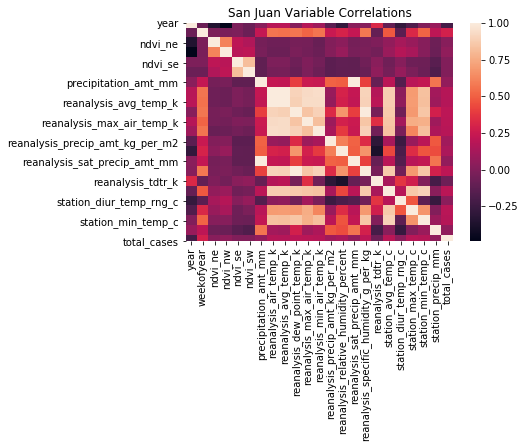

In [6]:
sj_correlations = sj.corr()
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1, 'Iquitos Variable Correlations')

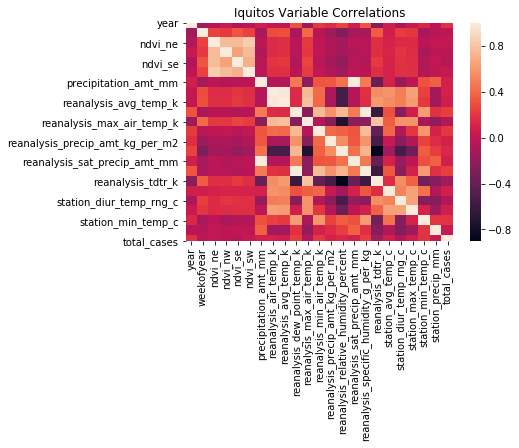

In [7]:
iq_correlations = iq.corr()
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

<h3>there where many zero in our data base so we removed Outliers 
Outliers=[< 0.05 Percentile] and [>0.95 Percentile]<h3>

In [13]:
iq.drop(iq[iq['precipitation_amt_mm'] < iq.precipitation_amt_mm.quantile(0.05)].index, inplace = True)
iq.drop(iq[iq['precipitation_amt_mm'] > iq.precipitation_amt_mm.quantile(0.95)].index, inplace = True)

In [16]:
iq.drop(iq[iq['total_cases'] < iq.total_cases.quantile(0.05)].index, inplace = True)
iq.drop(iq[iq['total_cases'] > iq.total_cases.quantile(0.95)].index, inplace = True)

In [45]:
df1=df.copy()
m1=0.001
m2=0.995
p=df1.quantile([m1,m2])
for i in df1.keys():
    
    if(i=='city' or i=='week_start_date' or i=="total_cases"):
        continue 
    dp=dict(p[i])
    df1.drop(df1[df1[i] < dp[m1]].index, inplace = True)
    df1.drop(df1[df1[i] > dp[m2]].index, inplace = True)

In [53]:
pd.isnull(df).any().any()

False

In [51]:
pd.isnull(iq).any().any()

False

In [52]:
pd.isnull(sj).any().any()

False

Text(0, 0.5, 'Number of cases')

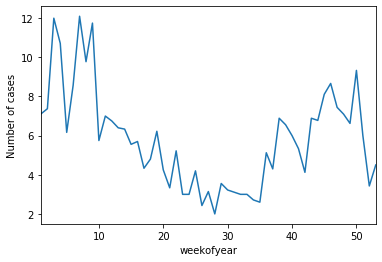

In [54]:
dfg = iq.groupby(['weekofyear'])['total_cases'].mean()
x=dfg.plot()
x.set_xlabel("weekofyear")
x.set_ylabel("Number of cases")

<h3>Belowimage from google and we shall interpret this also by using column "precipitation_amt_mm" <h3>

![alt text](sj.jpeg "Title")

Text(0, 0.5, 'Number of cases')

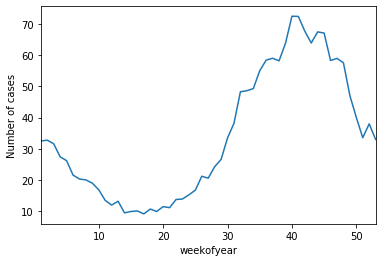

In [55]:
dfg = sj.groupby(['weekofyear'])['total_cases'].mean()
x=dfg.plot()
x.set_xlabel("weekofyear")
x.set_ylabel("Number of cases")

<h3>Belowimage from google and we shall interpret this also by using column "precipitation_amt_mm" <h3>

![alt text](iq.jpeg "Title")

<h2>Like the above example we will find find out correlation between Independent variables and "total_cases" in the upcoming weeks<h2>

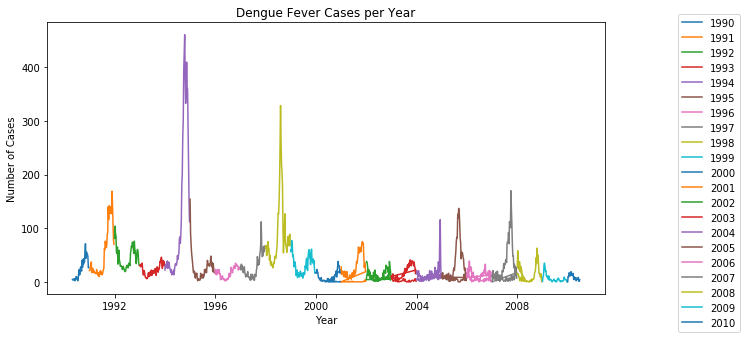

In [62]:
df=pd.read_csv('dengue_features_train.csv')
labels = pd.read_csv('dengue_labels_train.csv')
t_f=pd.isnull(df)
for i in t_f:
    c=0
    if(i=='city' or i=='week_start_date'):
        continue 
    mean_value=df[i].mean()
    df[i].fillna(value=mean_value, inplace=True)
df['week_start_date']=pd.to_datetime(df['week_start_date'])
df["total_cases"]=labels["total_cases"]
fig,ax = plt.subplots(figsize=(10,5))
for i in np.unique(df.week_start_date.dt.year.values):
    plt.plot(df[df.week_start_date.dt.year==i].week_start_date.T,df[df.week_start_date.dt.year==i].total_cases,label='%d'%(i));
    plt.legend();
    plt.title('Dengue Fever Cases per Year');
    plt.xlabel('Year')
    plt.ylabel('Number of Cases')
    ax.legend(bbox_to_anchor=(1.25, 1.05))

<h2>We could see some patterns in Number of Cases and we will try to find out the cause for such patterns <h2>

Text(0.5, 0.98, 'DENGUE ACTUAL CASES')

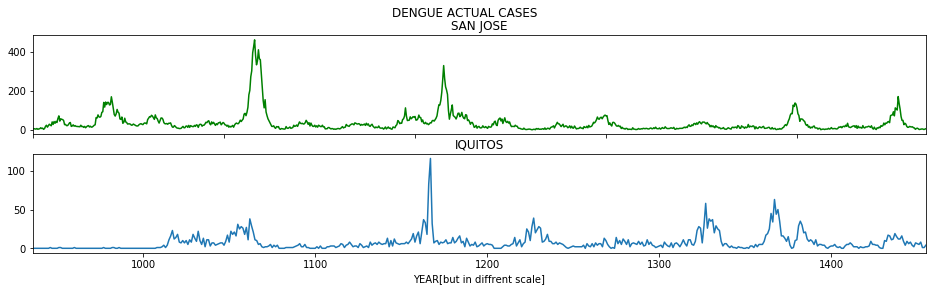

In [66]:
figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 4))

ax = df[df['city']=='sj'].total_cases.plot(ax=axes[0], label="San Juan", color='g')
ax.set_title('SAN JOSE')
ax.set_xticklabels([])
ax.set_xlabel("")

# plot iq
ax1 = df[df['city']=='iq'].total_cases.plot(ax=axes[1], label="Iquitos")
ax1.set_title('IQUITOS')
ax1.set_xlabel("YEAR[but in diffrent scale]")

plt.suptitle("DENGUE ACTUAL CASES")

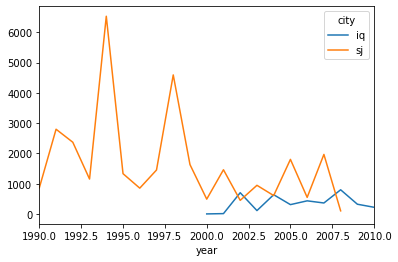

In [65]:
pv = pd.pivot_table(df, index=df.year, columns=df.city,values='total_cases', aggfunc='sum')
pv.plot()

<h2>Here we can Observe the dengue Outbreak in IQUITOS started late and Pattens[waves] appears at diffrent time there could be many factors like Rain Percentage of that year and etc... We shall find out all the factors causing this <h2>

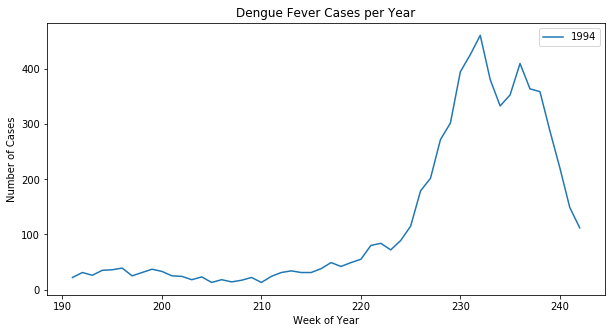

In [68]:
fig,ax = plt.subplots(figsize=(10,5))
for i in np.unique(df.year.values):
    if df[df.year==i].total_cases.mean() >= 100:
    #df[df.year==i].total_cases > 850:
        plt.plot(df[df.year==i].total_cases,label='%d'%(i));
        plt.legend();
        plt.title('Dengue Fever Cases per Year');
        plt.xlabel('Week of Year')
        plt.ylabel('Number of Cases')

<h2 If time permits 